In [1]:
import tensorflow as tf
print(tf.__version__)

from sklearn.datasets import load_breast_cancer

C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0


In [2]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

N, D = X_train.shape
print("N : {} \nD : {}".format(N, D))

N : 398 
D : 30


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


print("Train Score : ", model.evaluate(X_train, y_train))
print("Test Score : ", model.evaluate(X_test, y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 2s 5ms/sample - loss: 0.5606 - accuracy: 0.7312 - val_loss: 0.5652 - val_accuracy: 0.7661
Epoch 2/100
398/398 [==============================] - 0s 153us/sample - loss: 0.5112 - accuracy: 0.7839 - val_loss: 0.5214 - val_accuracy: 0.7836
Epoch 3/100
398/398 [==============================] - 0s 126us/sample - loss: 0.4689 - accuracy: 0.8116 - val_loss: 0.4848 - val_accuracy: 0.8187
Epoch 4/100
398/398 [==============================] - 0s 118us/sample - loss: 0.4338 - accuracy: 0.8518 - val_loss: 0.4528 - val_accuracy: 0.8246
Epoch 5/100
398/398 [==============================] - 0s 93us/sample - loss: 0.4035 - accuracy: 0.8643 - val_loss: 0.4257 - val_accuracy: 0.8363
Epoch 6/100
398/398 [==============================] - 0s 92us/sample - loss: 0.3777 - accuracy: 0.8894 - val_loss: 0.4026 - val_accuracy: 0.8538
Epoch 7/100
398/398 [==============================] - 0s 101us/sample - los

398/398 [==============================] - 0s 97us/sample - loss: 0.1163 - accuracy: 0.9724 - val_loss: 0.1278 - val_accuracy: 0.9591
Epoch 57/100
398/398 [==============================] - 0s 100us/sample - loss: 0.1152 - accuracy: 0.9724 - val_loss: 0.1265 - val_accuracy: 0.9591
Epoch 58/100
398/398 [==============================] - 0s 100us/sample - loss: 0.1141 - accuracy: 0.9724 - val_loss: 0.1249 - val_accuracy: 0.9591
Epoch 59/100
398/398 [==============================] - 0s 93us/sample - loss: 0.1130 - accuracy: 0.9724 - val_loss: 0.1236 - val_accuracy: 0.9591
Epoch 60/100
398/398 [==============================] - 0s 98us/sample - loss: 0.1120 - accuracy: 0.9724 - val_loss: 0.1223 - val_accuracy: 0.9591
Epoch 61/100
398/398 [==============================] - 0s 104us/sample - loss: 0.1110 - accuracy: 0.9724 - val_loss: 0.1212 - val_accuracy: 0.9532
Epoch 62/100
398/398 [==============================] - 0s 100us/sample - loss: 0.1101 - accuracy: 0.9749 - val_loss: 0.1199 - v

Train Score :  [0.08739380920352648, 0.98241204]
171/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

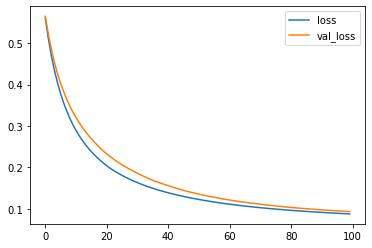

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label='val_loss')
plt.legend()

plt.show()

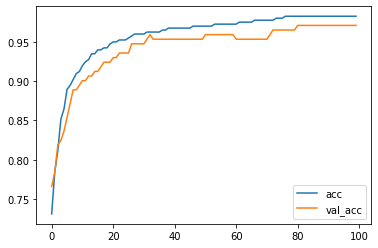

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()